# Machine Learning Coursework 2

For coursework 2 you will be asked to train and evalute several different classifiers: Naïve Bayes classifier, Random Forest classifier, and kNN classifier using the iris dataset. You will be asked to answer a series of questions relating to each individual model and questions comparing each model. 

#### You are free to use the sklearn library. 


Notes:
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Code                                               | 7     |
| Code Report/comments                               | 6     |
| Model questions                                    | 14    |  
| Model comparision questions                        | 18    |
| Total available                                    |**45** |  

##### Remember to save your notebook as “username_CW2.ipynb”. It is a good idea to re-run the whole thing before saving and submitting. 


### Links

https://scikit-learn.org/stable/modules/model_evaluation.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier







## 1. Classifiers [7 marks total]
Code and train your three classifiers in the cells below the corresponding header. You do not need to implement cross-validation in this coursework, simply fit the data. You are free to use sklearn and other packages where necessary.  



In [6]:
# import datasets
from sklearn import datasets 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# load data
iris = datasets.load_iris() # load data 
print(iris.DESCR) # print dataset description


df_iris = pd.DataFrame(iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = iris.target

print(df_iris.head())
df_iris.describe()


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
from sklearn.metrics import accuracy_score


def get_accuracy(y_test, y_pred):
    """ Return accuracy score as a % from test and predicted y value inputs"""
    acc_score = accuracy_score(y_test, y_pred)
    return round(acc_score*100, 2)
    


### 1.1 Naïve Bayes Classifier [2]
Train a naïve bayes classifier in python. 

Use your code to fit the data given above. 

https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df_iris, y, test_size=0.3, random_state=7)

In [9]:
#Write your code here
nbc = GaussianNB()
nbc.fit(X_train, y_train)
y_pred_nbc = nbc.predict(X_test)

nbc_accuracy = get_accuracy(y_test, y_pred_nbc)

print("Naive Bayes Classifier Model Accuracy: {}%".format(nbc_accuracy))

Naive Bayes Classifier Model Accuracy: 88.89%


### 1.2 Random Forst Classifier [3]
Train a random forest classifier in python. Use your code to fit the data given above. 

Evaluate feature performance of the model. 

Visualise the feature importance. 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier

In [10]:
#Write your code here

rfc = RandomForestClassifier(random_state = 0, n_estimators=100)
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

rfc_accuracy = get_accuracy(y_test, y_pred_rfc)

print("Random Forest Classifier Model Accuracy: {}%".format(rfc_accuracy))
# print(df_iris.columns)
# print(rfc.feature_importances_)

Random Forest Classifier Model Accuracy: 91.11%


### 1.3 kNN Classifier [2]
Train a kNN classifier in python. 

Use your code to fit the data given above. 

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  
https://scikit-learn.org/stable/modules/neighbors.html#classification

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
#Write your code here
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)



def knn_accuracy(X_train, y_train, X_test, y_test, n_neighbors):
    """ Return kNN model accuracy
    
    Build a kNN classifier model.
    Inputs: x_train, y_train, x_test, y_test
    n_neighbors: number of neighbors to use in the knn classifier
    """
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)

    knn_accuracy = get_accuracy(y_test, y_pred_knn)

    print("kNN Classifier Model Accuracy with k = {} : {}%".format(n_neighbors, knn_accuracy))
    



In [13]:
knn_accuracy(X_train, y_train, X_test, y_test, 2)
knn_accuracy(X_train, y_train, X_test, y_test, 3)
knn_accuracy(X_train, y_train, X_test, y_test, 5)
knn_accuracy(X_train, y_train, X_test, y_test, 6)
knn_accuracy(X_train, y_train, X_test, y_test, 9)
knn_accuracy(X_train, y_train, X_test, y_test, 10)
knn_accuracy(X_train, y_train, X_test, y_test, 11)
knn_accuracy(X_train, y_train, X_test, y_test, 15)
knn_accuracy(X_train, y_train, X_test, y_test, 20)

kNN Classifier Model Accuracy with k = 2 : 95.56%
kNN Classifier Model Accuracy with k = 3 : 93.33%
kNN Classifier Model Accuracy with k = 5 : 91.11%
kNN Classifier Model Accuracy with k = 6 : 91.11%
kNN Classifier Model Accuracy with k = 9 : 91.11%
kNN Classifier Model Accuracy with k = 10 : 95.56%
kNN Classifier Model Accuracy with k = 11 : 91.11%
kNN Classifier Model Accuracy with k = 15 : 93.33%
kNN Classifier Model Accuracy with k = 20 : 88.89%


## 2 Code Report [6 marks total]
In a markdown box, write a short report (no more than 500 words) that describes the workings of your code. 

The iris dataset is loaded into a dataframe and I use the pandas describe function to get the general statistics. There are 4 features of the dataset, sepal length, sepal width, petal length and petal width and 3 possible classes of iris: setosa, versicolour, virginica. The data is split into a test and training dataset. The training data is 70% of the data while reserving 30% for testing. The first classifier is the Naive Bayes classifier, specifically the sklearn Gaussian Naive Bayes. The model is fit with the training data then and then given the test features to predict the correct classification. This model had an 88.89% accuracy. The same procedure was done with the sklearn random forest classifier, it was trained using the same test data set and tested using the same set of test features. This model also had an accuracy of 88.89%. The last classifier was the sklearn Nearest Neighbors classifier. This model was also fitted with the training values and classes and then used to predict the correct classes using the holdout test dataset. The parameter ‘n_neighbors’ was set to 3 as there are 3 separate classes we are looking for. If this parameter was left to its default value of 5, the model actually decreased in accuracy from 93.33% to 91.11%. The k nearest neighbors classifier was the best performing model of the 3. 


## 3 Model Questions [14 marks total]
Please answer the following questions relating to your classifiers. 

### 3.1 Naïves Bayes Questions [4]
Why do zero probabilities in our Naïve Bayes model cause problems? 

How can we avoid the problem of zero probabilities in our Naïve Bayes model? 

Please answer in the cell below.

The naive bayes model is based on probabilities based on the Bayes’ theorem assuming independence between the features in the model.   
In the example of classification, this algorithm calculates the probability of a class given the features.   
Based on the algorithm, if one of the classes happens to have 0 occurrences in the dataset, then the overall probability will always be   
0 and the classifier will never be able to predict that class.   In the context of this model, if the testing dataset happened to not  
have any examples of the Iris-Setosa class, then when the model is trained on the training dataset, it will not be able to predict any Iris-Setosa classes.   
The calculated probability would be 0 for Iris-Setosa.   

The way to avoid this is using Laplace smoothing. Sklearn’s Multinomial Naive Bayes classifier actually uses this method by default.   
This is usually used in text classification tasks where word counts are used to categorize a text. Many word counts would be 0 thus affecting a naive   
bayes classifier’s ability to predict the correct class of text. Laplace Smoothing uniformly adjusts the calculated probabilities to   
remove any 0 probabilities. This allows for the naive bayes algorithm to more accurately predict all classes. 



### 3.2 Random Forest Questions [6]
Which feature is the most important from your random forest classifier? 

Can any features be removed to increase accuracy of the model, if so which features? 

Explain why it would be useful to remove these features. 

Please answer in the cell below.

In [15]:
#Write your answer here
print(df_iris.columns)
print("Feature Importance:" ,rfc.feature_importances_)

rfc_acc = accuracy_score(y_test, y_pred_rfc)
print("Random Forest Classifier Model Accuracy: {}".format(accuracy_score(y_test, y_pred_rfc)))


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Feature Importance: [0.0902874  0.01658323 0.46360906 0.42952031]
Random Forest Classifier Model Accuracy: 0.9111111111111111


#### Feature Importance

We can see that petal width and petal length have the greatest importance in the model. They together account for about 87% of the model.  Sepal length and width only account for 9.0% and 16.5% respectively. Using this information we will remove these features and see if there is any change in accuracy which as it stands is at 88.8%. 


In [31]:
def rfc_model_with_select_features(X_train, X_test, y_train, y_test, columns):
    """ Return random forest classifier model accuracy
    
    Build a random forest classifier model and train with train values.
    Inputs: x_train, y_train, x_test, y_test
    columns: which features to include in the model
    """
    rfc = RandomForestClassifier(random_state=70)
    rfc.fit(X_train[columns], y_train)
    y_pred = rfc.predict(X_test[columns])
    accuracy = get_accuracy(y_test, y_pred)
    
    print("Random Forest Classifier Accuracy with {} feature(s): {}%".format(', '.join(map(str, columns)), accuracy))


In [17]:
all_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [18]:
rfc_model_with_select_features(X_train, X_test, y_train, y_test, all_cols)
rfc_model_with_select_features(X_train, X_test, y_train, y_test, ['sepal_width','petal_length','petal_width'])
rfc_model_with_select_features(X_train, X_test, y_train, y_test, ['sepal_length','petal_length','petal_width'])
rfc_model_with_select_features(X_train, X_test, y_train, y_test, ['petal_length', 'petal_width'])
rfc_model_with_select_features(X_train, X_test, y_train, y_test, ['petal_length'])
rfc_model_with_select_features(X_train, X_test, y_train, y_test, ['petal_width'])


Random Forest Classifier Accuracy with sepal_length, sepal_width, petal_length, petal_width feature(s): 91.11%
Random Forest Classifier Accuracy with sepal_width, petal_length, petal_width feature(s): 93.33%
Random Forest Classifier Accuracy with sepal_length, petal_length, petal_width feature(s): 91.11%
Random Forest Classifier Accuracy with petal_length, petal_width feature(s): 93.33%
Random Forest Classifier Accuracy with petal_length feature(s): 88.89%
Random Forest Classifier Accuracy with petal_width feature(s): 91.11%


#### Feature Removal

Model accuracy can improved by removing features that are less important to the model fitting. After removing both sepal width and sepal length, the model accuarcy increased from 91.11% to 93.33%. It's also worth noting that removing just sepal length also resulted in the accuarcy of the model increasing to 93.33%. 

Random forests use random subsets of data and features to create an ensemble of decision trees. If they use a subset of features that are not very good at predicting classes, these trees could reduce the accuracy of the overall random forest of decision trees. By removing these features and limiting it to the features with the highest importance, the features that may actually decrease the accuracy in predicition are not incorporated in the model, thus reducing the possible model errors produced, resulting in greater model accuracy. 



### 3.3 kNN Questions [4]
Do you think the kNN classifier is best suited to the iris dataset? 

What ideal qualities would the most appropriate dataset display?  

Please answer in the cell below.

In [32]:
#Write your answer here
import seaborn as sns

def myplotGrid(df, target):
   """ Build a pairplot using dataframe and the target column"""
   return sns.pairplot(data=df, hue=target, palette='crest')

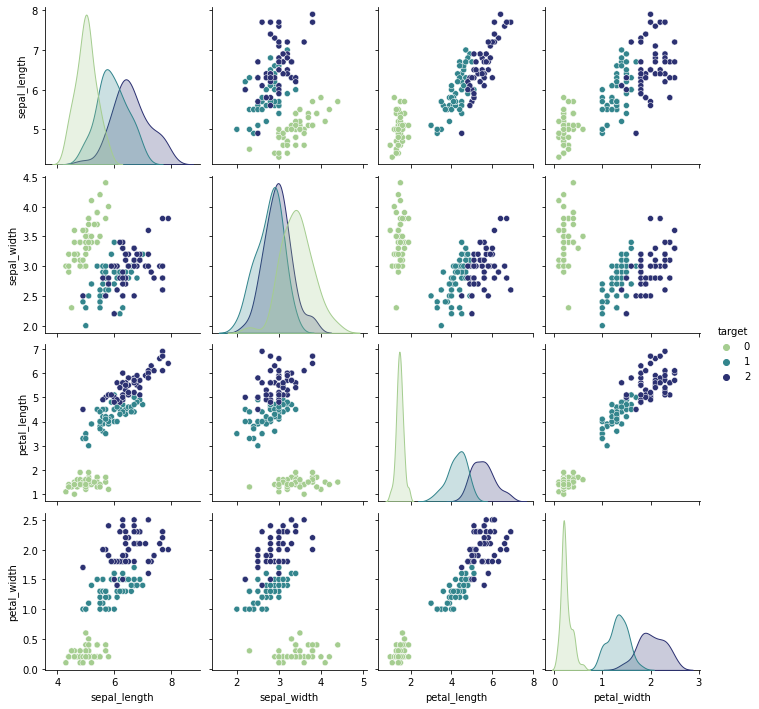

In [21]:
# create a plot of distributions of the features and classes
df_iris_w_y = df_iris
df_iris_w_y['target'] = y
myplotGrid(df_iris_w_y, 'target')

This dataset is best suited for the kNN classifier of the 3 models trained as it has the highest accuarcy. The kNN classifier produced a range of accuracies depending on the number of neighbors parameter with the peak accuarcy being 95.56% when k was set to 10. The next best accuracy was 93.33% for the random forest model once the features were trimmed. 

By plotting the distributions of the features and their associated classes, we can see distinct clusters form. Class 0 is clearly seperated from class 1 and 2 so kNN should be able to predict that with a high degree of accuarcy. Class 1 and 2 do have some overlap but overall are still distinct when looking at petal length and width. This visual representation helps to show that when these features are plotted we can see distinct clusters making the kNN classifier an ideal model choice for the iris dataset. The histograms of the features on the diagonal of the plot help to show that petal length and petal width have the most distinct seperation as well. Sepal width is not a good distinguishing features between classes as there is significant overlap between the datapoints. 

The ideal data for a kNN model would be data with distinct distances between feature data. This algorithm is based on calculating the dsitance between features so if the features are intermixed and clustered together then kNN would have a very hard time trying to determine the appropriate classes. If this dataset had a little bit more seperation between target 1 and 2 the kNN classifier would have an even better chance at achieving an even higher accuarcy than the 95% it achieved. 

## 4 Comparing Models [18 marks total]
Please answer the following questions comparing your classifiers.

### 4.1 Compare each model [3]
What differences do you see between your Naïve Bayes classifier, your random forest classifier, and your kNN classifier? 

In [35]:
from sklearn.metrics import f1_score

def get_confusion(predicted, actual):
    """ Build confusion matrix from predicted and actual values"""
    cm = np.zeros((3,3))
    for i, item in enumerate(predicted):
        cm[actual[i], item] +=1
    return cm

def print_cm(cm):
    """ Print Confusion Matrix in a readable table form"""
    print('  === CONFUSION MATRIX ===')
    print('         Predicted ')
    print('          0  1  2')
    print('         ------------')
    print('       0 | %s  %s  %s ' % (int(cm[0,0]), int(cm[0,1]), int(cm[0,2])))
    print('actual 1 | %s  %s  %s ' % (int(cm[1,0]), int(cm[1,1]), int(cm[1,2])))
    print('       2 | %s  %s  %s ' % (int(cm[2,0]), int(cm[2,1]), int(cm[2,2])))
    print('\n')

def get_precision_recall(cm):
    """Calculate precission recall values"""
    print(' === PRECISION AND RECALL ===')
    for i, x in enumerate(cm):
        precision = cm[i,i] / (cm[0,i]+ cm[1,i] + cm[2,i])
        recall = cm[i,i] / (cm[i,0]+ cm[i,1] + cm[i,2])
        print('Class %s Precision: %s || Recall: %s' % (i, round(precision,3), round(recall,3)))
        

def get_f1_score(y_pred, y_test):
    """Calculate f1 Score from predicted and actual values"""
    score = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
    print("F1 Score: {}".format(round(score,2)))
    

def get_accuracy_metrics(y_pred, y_test):
    """Return all accuracy metrics: 
    F1 score, confusion matrix, precision recall, accuarcy
    """
    cm= get_confusion(y_pred, y_test)
    print_cm(cm)
    get_precision_recall(cm)
    accuracy = get_accuracy(y_test, y_pred)
    print('Model Accuracy Score: {}%'.format(accuracy))
    get_f1_score(y_pred, y_test)
    


### Niave Bayes Classifier Model Quality Metrics


In [34]:
get_accuracy_metrics(y_pred_nbc, y_test)


  === CONFUSION MATRIX ===
         Predicted 
          0  1  2
         ------------
       0 | 12  0  0 
actual 1 | 0  13  3 
       2 | 0  2  15 


 === PRECISION AND RECALL ===
Class 0 Precision: 1.0 || Recall: 1.0
Class 1 Precision: 0.867 || Recall: 0.812
Class 2 Precision: 0.833 || Recall: 0.882
Model Accuracy Score: 88.89%
F1 Score: 0.9


### Random Forest Classifier Model Quality Metrics

In [24]:
get_accuracy_metrics(y_pred_rfc, y_test)

  === CONFUSION MATRIX ===
         Predicted 
          0  1  2
         ------------
       0 | 12  0  0 
actual 1 | 0  14  2 
       2 | 0  2  15 


 === PRECISION AND RECALL ===
Class 0 Precision: 1.0 || Recall: 1.0
Class 1 Precision: 0.875 || Recall: 0.875
Class 2 Precision: 0.882 || Recall: 0.882
Model Accuracy Score: 91.11%
F1 Score: 0.92


### kNN Classifier Model Quality Metrics

In [25]:
get_accuracy_metrics(y_pred_knn, y_test)

  === CONFUSION MATRIX ===
         Predicted 
          0  1  2
         ------------
       0 | 12  0  0 
actual 1 | 0  16  0 
       2 | 0  2  15 


 === PRECISION AND RECALL ===
Class 0 Precision: 1.0 || Recall: 1.0
Class 1 Precision: 0.889 || Recall: 1.0
Class 2 Precision: 1.0 || Recall: 0.882
Model Accuracy Score: 95.56%
F1 Score: 0.96


All three models correctly predicted every class 0 target in the test set. Looking at the distribution of features as shown earlier this class was clearly sperated from the other two while target 1 and 2 have a little more overlap in their features. The niave bayes classifier had one more incorrect prediction of class 1 as class 2 compared to the random forest classifier. The kNN classifier correctly predicted all class 0 and class 1 targets but also had 2 class 2 targets to predicted to be class 1 as well which was the same for the other models. 

Overall model accuracy of the Niave Bayes model is 88.89%. The random forest classifier accuracy was 91.11% and the highest accuarcy model was the kNN classifier at 95.56%. 

### 4.2 Accuracy [6]
Can you explain why there are differences in accuracy between the three classifiers? 

#### Get the datapoints that were classified differently

In [26]:
df_pred = X_test.copy()
df_pred['actual'] = y_test
df_pred.loc[:,'p_nbc'] = y_pred_nbc
df_pred['p_rfc'] = y_pred_rfc
df_pred['p_knn'] = y_pred_knn
df_pred_no_2 = df_pred[df_pred['actual'] < 2]
df_pred_no_2 = df_pred_no_2[
    (df_pred_no_2['p_rfc'] != df_pred_no_2['p_nbc']) | 
    (df_pred_no_2['p_rfc'] != df_pred_no_2['p_knn']) |
    (df_pred_no_2['p_nbc'] != df_pred_no_2['p_knn'])
]

df_pred_no_2

,sepal_length,sepal_width,petal_length,petal_width,actual,p_nbc,p_rfc,p_knn
52,6.9,3.1,4.9,1.5,1,2,1,1
77,6.7,3.0,5.0,1.7,1,2,2,1
70,5.9,3.2,4.8,1.8,1,2,2,1


The accuracy of the models is calculated as a percentage of correct predictions of the model on the test dataset. The test set we used was 30% of the dataset for a total of 45 test points. The accuracy of all models was quite high with only slight differences in accuracy. When looking at the actual differences in predicted values, we can see that the models had almost all of the same predictions except for 3 test values. The knn classifier correctly predicted all 3 of these while the random forest classifier correctly predicted 2 and the Naive Bayes model misclassified all three. So overall the difference in accuracies between the models comes down to 3 data points. The difference in these predictions comes down to how these models make their predictions. The kNN model correctly predicts all of these data points so this data is best predicted by looking at the other data points around it and finding the closest ones to make its prediction. The random forest classifier bases its prediction on an ensemble of decision trees but for these data points they are intermixed very closely with class 2 and as a result it incorrectly predicts them. The Naive Bayes classifier in this case has even more trouble with the data that overlaps here, calculating the probabilities of these data points to be in line with a class 2 classification instead of a class 1.

### 4.3 Appropriate Use [9]
When would it be appropriate to use each different classifier? 

Reference real-world situations and examples of specific data sets and explain why that classifier would be most appropriate for that use-case.

Each of the models used above have their own advantages and disadvantages. Depending on the type of data, one classifier may be more appropriate than another or some may perform similarly. Even if it seems like a dataset may be more appropriate for a certain model, if the dataset is small enough or enough computational power is available, it is worthwhile to run some preliminary models of different types to see which produces the best results. 

The naive Bayes (NB) classifier lends itself to a wide range of data problems because of its ability to quickly and efficiently fit models, requiring little data to make accurate predictions and having few parameters to tune. They are faster to train than both kNN and random forest models. This is good for models that need to be updated quickly or need real time predictions. This classifier is better suited to handle high dimensional data, that is a dataset with many features, than a kNN model. The more features a dataset has, the more spread out the data is so a (NB) model is better suited in this case.  

Naive Bayes classifiers are particularly adept at text classification and sentiment analysis problems. One particular real world example of this is email spam filtering. Email filtering requires dynamic analysis as the model would need to be able to categorize incoming messages as they happen, another classifier such as kNN, where the model would have to be rebuilt every time this happens may not be appropriate for such a use case. A spam filtering dataset would also have a lot of features as it is a text analysis problem so the Naive Bayes classifier could be well suited. An example dataset is this dataset for spam filtering found on kaggle (https://www.kaggle.com/veleon/ham-and-spam-dataset). It contains around 3000 emails of which 500 are spam. This can be used to train a spam filter using a Naive Bayes classifier. 

K nearest neighbor (kNN) classifiers are based on a clustering algorithm and generally good for solving problems that are trying to find similarities between data points with a high level of accuracy. The data does not have to be linear and no general assumptions about the distribution of the data are needed to be able to train a kNN classifier model. They tend to work better with a higher number of observations. As discussed before, kNN classifiers are not greatly suited for datasets with very large numbers of features. The curse of dimensionality affects this algorithm, the greater the dimensionality of the data, the further and further apart the cluster possibly resulting in less accurate predictions. This classifier is slow computationally as the distances between each datapoint have to be calculated. This model doesn’t make for a good classifier of dynamic or streaming datasets.  A good use for  k nearest neighbors classifier would be looking at medical diagnoses such as this dataset used for predicting the onset of diabetes (https://www.kaggle.com/uciml/pima-indians-diabetes-database). Medical diagnoses require a high degree of accuracy and this dataset has 9 features and 768 data points. 


Random Forest (RF) classifiers are a robust model that can be used for a wide range of classification tasks. They can handle both numerical and categorical data quite well. Another advantage is that they are an interpretable model so that decisions can be made in terms of the features that make up the classifier. In sklearn’s library the classifier function can return the feature importance metric for each feature used in the model to help with interpretation of the model. RF classifiers can take a while to train but are able to be trained in parallel as each decision tree is independent of one another so this model has the potential to handle big data as well. However, if computational power is limited this model can take a while to train as it requires training many trees to create the overall RF classifier. This ensemble classifier makes it good at dealing with missing data and outliers, it’s very stable with the addition and removal of data. By selecting subsets of features and data, the RF classifier is good for handling data with lots of features as only subsets of these features are used in the individual decision trees. RF classifiers can be good for banking, looking for credit risks or fraudulent transactions, ecommerce predictions, and medical predictions as well.  A good problem data set for an RF classifier is an ecommerce dataset (https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish) used to help predict sales. This dataset has a lot of features, both numerical and categorical and a RF classifier would be good to predict future sales of products in this use case. The addition of new data from future sales of products would not greatly affect the models predictions. 
